In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
#数据是否需要标准化
scale = False

In [2]:
#载入数据
data = np.genfromtxt("LR-testSet2.txt",delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

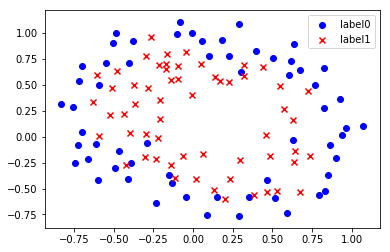

In [3]:
def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
        
    #画图
    scatter0 = plt.scatter(x0,y0,c = 'b' , marker='o')
    scatter1 = plt.scatter(x1 ,y1 ,c = 'r' , marker='x')
    #画图例
    plt.legend(handles = [scatter0 , scatter1],labels = ['label0','label1'],loc = 'best') 

plot()
plt.show()

In [4]:
#定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=2)

In [5]:
x_poly = poly_reg.fit_transform(x_data)

In [6]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat , yMat , ws):
    left = np.multiply(yMat , np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat , np.log(1 - sigmoid(xMat * ws)))
    
    return np.sum(left + right)/-(len(xMat))

def gradAscent(xArr , yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epochs = 50000
    costList = []
    #计算数据列数，有几列就有几个权值
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1)))
    for i in range(epochs + 1):
        #xMat 和weights矩阵相乘
        h = sigmoid(xMat * ws)
        #计算误差
        ws_gard = xMat.T * (h - yMat)/m
        ws = ws - lr*ws_gard
        
        if i % 50 == 0:
            costList.append(cost(xMat , yMat , ws))
    return ws,costList

In [7]:
#训练模型 得到权值和cost值的变化
ws,costList = gradAscent(x_poly , y_data)
print(ws)

[[ 4.29730126]
 [ 2.56620066]
 [ 3.35375376]
 [-9.98025403]
 [-5.8551693 ]
 [-9.66822661]]


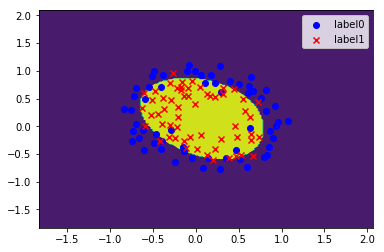

In [8]:
#获取数据值所在的范围
x_min , x_max = x_data[:,0].min() - 1 , x_data[:,0].max() + 1
y_min , y_max = x_data[:,1].min() - 1 , x_data[:,1].max() + 1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min , x_max , 0.02)
                    ,np.arange(x_min,y_max,0.02))
z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(),yy.ravel()]).dot(np.array(ws)))
for i in range(len(z)):
    if z[i]> 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

#画等高线图
cs = plt.contourf(xx,yy,z)
plot()
plt.show()

In [9]:
#预测
def predict(x_data,ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x>= 0.5 else 0 for x in sigmoid(xMat * ws)]

prediction = predict(x_poly , ws)

print(classification_report(y_data , prediction))

             precision    recall  f1-score   support

        0.0       0.86      0.83      0.85        60
        1.0       0.83      0.86      0.85        58

avg / total       0.85      0.85      0.85       118



In [26]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_data)
x_poly

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  3.58643425e-02,  4.89384194e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02,  4.69142804e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01,
         4.56719641e-02, -1.47940748e-01,  4.79210063e-01],
       [ 1.00000000e+00, -3.75000000e-01,  5.02190000e-01,
         1.40625000e-01, -1.88321250e-01,  2.52194796e-01],
       [ 1.00000000e+00, -5.13250000e-01,  4.65640000e-01,
         2.63425562e-01, -2.38989730e-01,  2.16820610e-01],
       [ 1.00000000e+00, -5.24770000e-01,  2.09800000e-01,
         2.75383553e-01, -1.10096746e-01,  4.40160400e-02],
       [ 1.00000000e+00, -3.98040000e-01,  3.43570000e-02,
         1.58435842e-01, -1.36754603e-02,  1.18040345e-03],
       [ 1.00000000e+00, -3.05880000e-01, -1.92250000e-01,
         9.35625744e-02,  5.88054300e-02,  3.69600625e-02],
       [ 1.00000000e+00,  1.67050000e-02, -4.042

In [16]:
x_data

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0